In [34]:
%matplotlib inline
import pandas as pd
import numpy as np

import networkx as nx #plot data as graph
import matplotlib.pyplot as plt #use this to make spring layout graph
import cartopy.crs as ccrs #project this onto map of the USA
import cartopy.feature as cfeature

In [35]:
cloud = pd.read_csv('cloud.csv')

In [36]:
cloud

,origin,destination,count,activity
0,BoI,ACCENTURE,449,Risk Management
1,BARC,AWS,853,Cloud Services
2,BARC,AWS,1,Cloud Services
3,CITI,AWS,1067,Loan Processing
4,SANUK,AWS,433,FX Trading
...,...,...,...,...
194,NOMURA,SLC,983,Cloud Services
195,UBS,SLC,367,Cloud Services
196,VIRGIN,SLC,367,Loan Processing
197,BoI,SLC,449,FX Trading


In [37]:
G = nx.from_pandas_edgelist(cloud,
                           source='origin',
                           target='destination',
                           edge_attr ='count',
                           create_using=nx.Graph())

nx.info(G)

'Graph with 34 nodes and 78 edges'

In [38]:
sg = next(G.subgraph(c) for c in nx.connected_components(G))

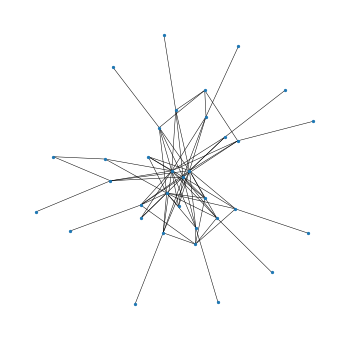

In [39]:
#nx.draw_network(G)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                node_size=5, width=.5)
ax.set_axis_off()

In [40]:
pos = nx.kamada_kawai_layout(G)
pos

{'BoI': array([-0.35092893,  0.28459061]),
 'ACCENTURE': array([-0.60039716,  0.71709917]),
 'BARC': array([0.24440714, 0.25599448]),
 'AWS': array([0.06295405, 0.04497241]),
 'CITI': array([-0.31074606, -0.17061396]),
 'SANUK': array([0.04393835, 0.35165918]),
 'HSBC': array([-0.17102693,  0.42178723]),
 'BNP': array([ 0.45060789, -0.00813728]),
 'COOP': array([ 0.40137503, -0.20717327]),
 'DB': array([0.46426612, 0.08537362]),
 'GS': array([ 0.2444278 , -0.39100942]),
 'AIB': array([-0.03098413,  0.55725497]),
 'BNYM': array([0.24663462, 0.46287427]),
 'JPM': array([ 0.08774894, -0.38731676]),
 'MONZO': array([-0.20648866, -0.3592908 ]),
 'NOMURA': array([-0.42828801,  0.16538099]),
 'UBS': array([-0.32629443, -0.29799516]),
 'BLOOM': array([-0.21778547,  0.06771388]),
 'VIRGIN': array([-0.49516024, -0.00732956]),
 'BT': array([0.10926923, 0.92381256]),
 'GOOG': array([-0.00551065,  0.00443987]),
 'HORIZON': array([-1.        ,  0.02946204]),
 'HP': array([-0.83079523,  0.45321639]),

In [41]:
G.edges

EdgeView([('BoI', 'ACCENTURE'), ('BoI', 'AWS'), ('BoI', 'BLOOM'), ('BoI', 'MSFT'), ('BoI', 'GOOG'), ('BoI', 'SLC'), ('BARC', 'AWS'), ('BARC', 'BLOOM'), ('BARC', 'GOOG'), ('BARC', 'MSFT'), ('AWS', 'CITI'), ('AWS', 'SANUK'), ('AWS', 'HSBC'), ('AWS', 'BNP'), ('AWS', 'COOP'), ('AWS', 'DB'), ('AWS', 'GS'), ('AWS', 'AIB'), ('AWS', 'BNYM'), ('AWS', 'JPM'), ('AWS', 'MONZO'), ('AWS', 'NOMURA'), ('AWS', 'UBS'), ('CITI', 'BLOOM'), ('CITI', 'GOOG'), ('CITI', 'MSFT'), ('CITI', 'SLC'), ('SANUK', 'BLOOM'), ('SANUK', 'GOOG'), ('SANUK', 'MSFT'), ('HSBC', 'BLOOM'), ('HSBC', 'GOOG'), ('BNP', 'MSFT'), ('BNP', 'GOOG'), ('BNP', 'PICO'), ('COOP', 'MSFT'), ('COOP', 'GOOG'), ('COOP', 'PHX'), ('COOP', 'PING'), ('DB', 'MSFT'), ('DB', 'GOOG'), ('DB', 'PHX'), ('DB', 'PLUM'), ('GS', 'MSFT'), ('GS', 'ORACLE'), ('GS', 'GOOG'), ('GS', 'PHX'), ('AIB', 'BLOOM'), ('AIB', 'BT'), ('BNYM', 'BT'), ('BNYM', 'MSFT'), ('BNYM', 'GOOG'), ('BNYM', 'ZOOM'), ('JPM', 'BLOOM'), ('JPM', 'MSFT'), ('JPM', 'NEXUS'), ('JPM', 'GOOG'), ('JPM

In [42]:
cen = [('BoI', 'ACCENTURE'), ('BoI', 'AWS'), ('BoI', 'BLOOM'), ('BoI', 'MSFT'), ('BoI', 'GOOG'), ('BoI', 'SLC'), ('BARC', 'AWS'), ('BARC', 'BLOOM'), ('BARC', 'GOOG'), ('BARC', 'MSFT'), ('AWS', 'CITI'), ('AWS', 'SANUK'), ('AWS', 'HSBC'), ('AWS', 'BNP'), ('AWS', 'COOP'), ('AWS', 'DB'), ('AWS', 'GS'), ('AWS', 'AIB'), ('AWS', 'BNYM'), ('AWS', 'JPM'), ('AWS', 'MONZO'), ('AWS', 'NOMURA'), ('AWS', 'UBS'), ('CITI', 'BLOOM'), ('CITI', 'GOOG'), ('CITI', 'MSFT'), ('CITI', 'SLC'), ('SANUK', 'BLOOM'), ('SANUK', 'GOOG'), ('SANUK', 'MSFT'), ('HSBC', 'BLOOM'), ('HSBC', 'GOOG'), ('BNP', 'MSFT'), ('BNP', 'GOOG'), ('BNP', 'PICO'), ('COOP', 'MSFT'), ('COOP', 'GOOG'), ('COOP', 'PHX'), ('COOP', 'PING'), ('DB', 'MSFT'), ('DB', 'GOOG'), ('DB', 'PHX'), ('DB', 'PLUM'), ('GS', 'MSFT'), ('GS', 'ORACLE'), ('GS', 'GOOG'), ('GS', 'PHX'), ('AIB', 'BLOOM'), ('AIB', 'BT'), ('BNYM', 'BT'), ('BNYM', 'MSFT'), ('BNYM', 'GOOG'), ('BNYM', 'ZOOM'), ('JPM', 'BLOOM'), ('JPM', 'MSFT'), ('JPM', 'NEXUS'), ('JPM', 'GOOG'), ('JPM', 'PHX'), ('MONZO', 'BLOOM'), ('MONZO', 'LEXIS'), ('MONZO', 'MSFT'), ('MONZO', 'GOOG'), ('MONZO', 'SLC'), ('NOMURA', 'BLOOM'), ('NOMURA', 'HP'), ('NOMURA', 'MSFT'), ('NOMURA', 'GOOG'), ('NOMURA', 'SLC'), ('UBS', 'BLOOM'), ('UBS', 'IBM'), ('UBS', 'MSFT'), ('UBS', 'GOOG'), ('UBS', 'SLC'), ('BLOOM', 'VIRGIN'), ('VIRGIN', 'HORIZON'), ('VIRGIN', 'MSFT'), ('VIRGIN', 'GOOG'), ('VIRGIN', 'SLC')]

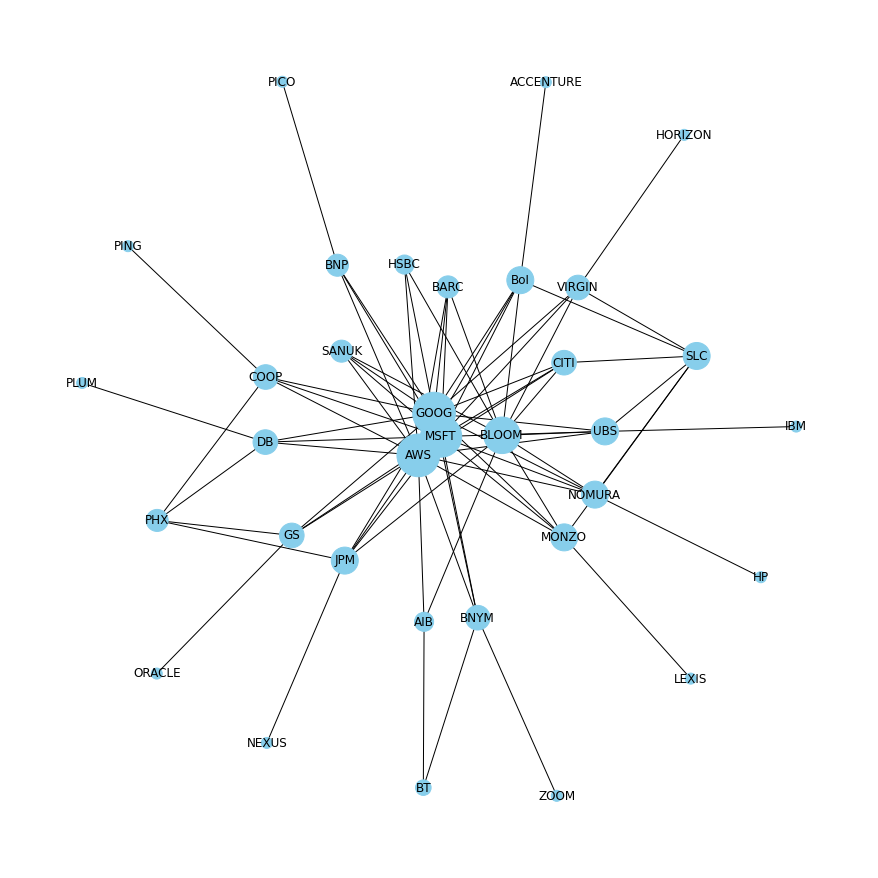

In [65]:
G = nx.Graph()
G.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(G).values())]  

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G) 
nx.draw(G, with_labels=True, node_color='skyblue', node_size=size, edge_cmap=plt.cm.Blues, arrows=False, pos = pos)
plt.show()

No handles with labels found to put in legend.


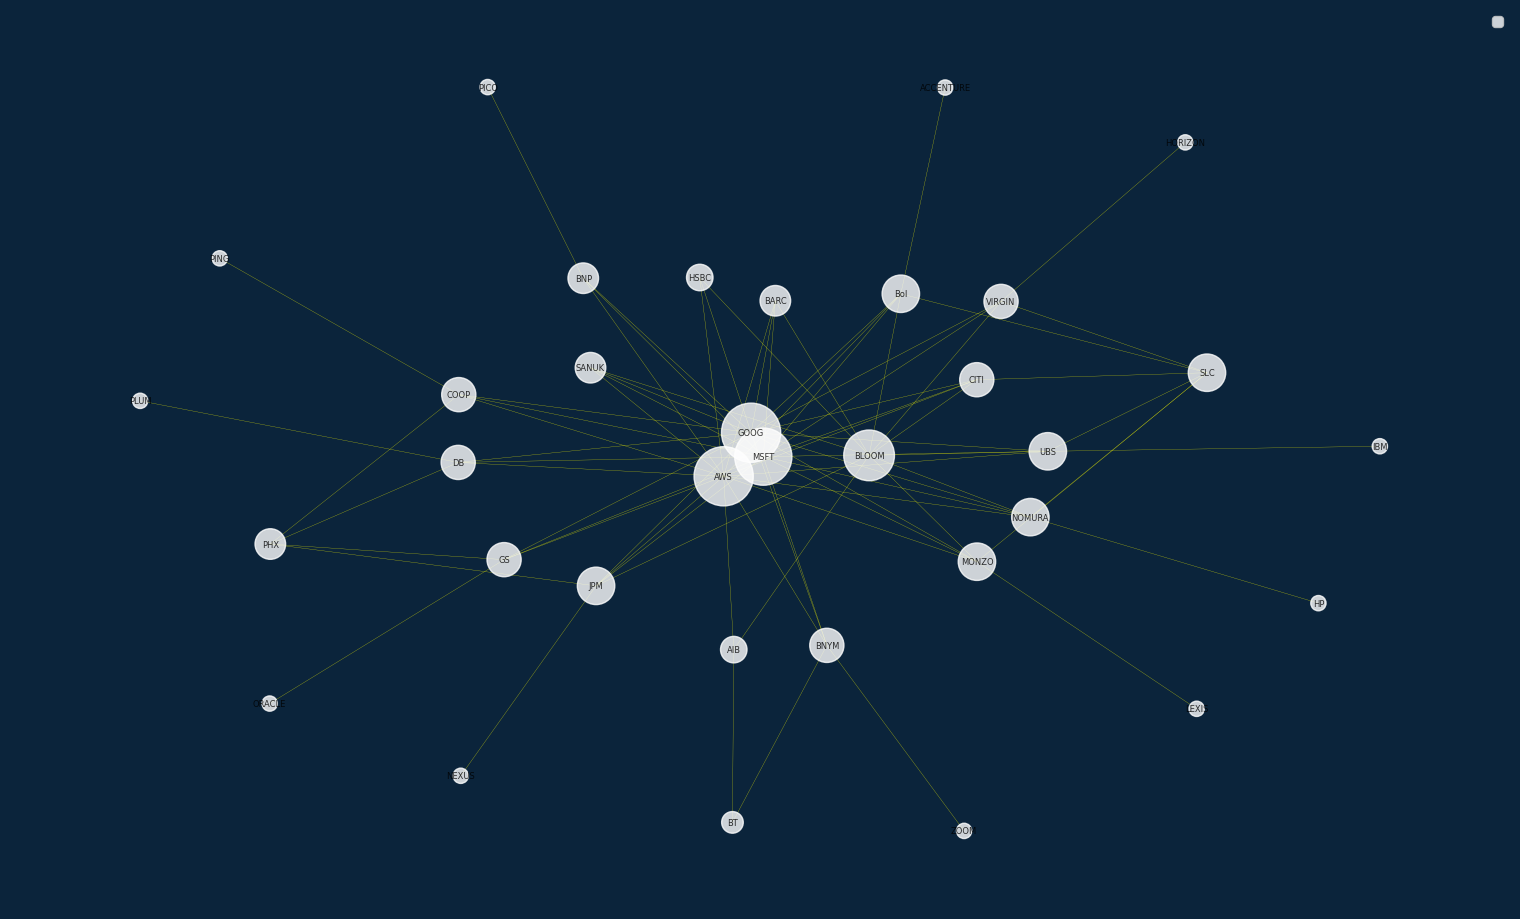

In [44]:
#Graph 1
pd.set_option('precision',10)
C = nx.Graph()
C.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(C).values())]

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]
#size = [(degree[n]) for n in nodes]

pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G, k = 0.2)
cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (15,9), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size=size, with_labels= True,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

In [64]:
G = nx.Graph()
G.add_edges_from(cen)
size = [x*4000 for x in list(nx.degree_centrality(G).values())]  

plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G) 

Nodelist=['BLOOM'] 
def nodecolor():
    node_colors = []
    for n in G.nodes():
        if n in list(NodeList):
            node_colors.append('red')
        else:
            node_colors.append('blue')
    return node_colors

nx.draw(G, with_labels=True, node_color=nodecolor(), node_size=size, edge_cmap=plt.cm.Blues, arrows=True, pos = pos)
plt.show()

NameError: name 'NodeList' is not defined

<Figure size 864x864 with 0 Axes>